<a href="https://colab.research.google.com/github/poojan14/MNIST/blob/master/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
(mnist_train_images, mnist_train_labels), (mnist_test_images,mnist_test_labels)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images=mnist_train_images.reshape(60000,784)
test_images=mnist_test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images /=255
test_images /=255

In [0]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


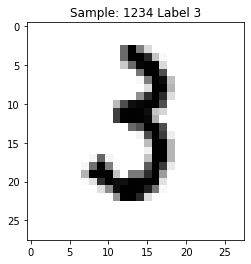

In [0]:
import matplotlib.pyplot as plt
def display_sample(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train_images[num].reshape([28,28])
  plt.title('Sample: %d Label %d' %(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
display_sample(1234)



In [0]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,batch_size=100,epochs=10,verbose=2,validation_data=(test_images,test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 9s - loss: 0.2091 - acc: 0.9382 - val_loss: 0.1264 - val_acc: 0.9592
Epoch 2/10
 - 8s - loss: 0.0774 - acc: 0.9761 - val_loss: 0.0977 - val_acc: 0.9678
Epoch 3/10
 - 8s - loss: 0.0521 - acc: 0.9832 - val_loss: 0.0718 - val_acc: 0.9770
Epoch 4/10
 - 9s - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0765 - val_acc: 0.9750
Epoch 5/10
 - 8s - loss: 0.0298 - acc: 0.9900 - val_loss: 0.0716 - val_acc: 0.9783
Epoch 6/10
 - 8s - loss: 0.0234 - acc: 0.9921 - val_loss: 0.0788 - val_acc: 0.9783
Epoch 7/10
 - 8s - loss: 0.0192 - acc: 0.9939 - val_loss: 0.0766 - val_acc: 0.9802
Epoch 8/10
 - 8s - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0888 - val_acc: 0.9758
Epoch 9/10
 - 8s - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0913 - val_acc: 0.9776
Epoch 10/10
 - 8s - loss: 0.0149 - acc: 0.9950 - val_loss: 0.0819 - val_acc: 0.9787


In [0]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])

Test loss: 0.0818665995246266
Test accuracy 0.9787


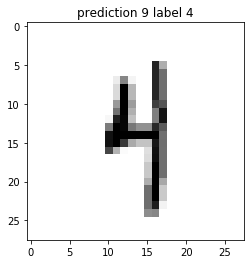

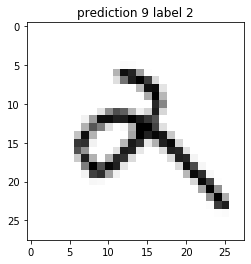

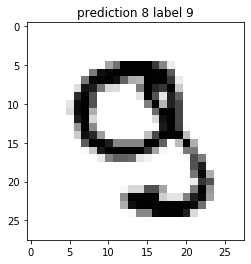

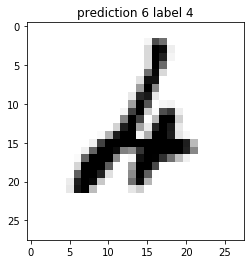

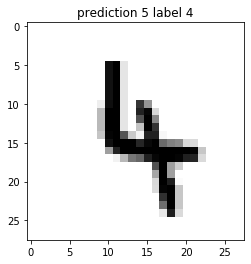

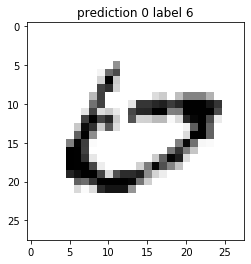

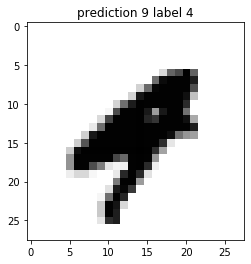

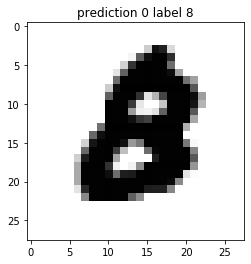

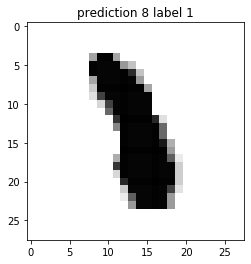

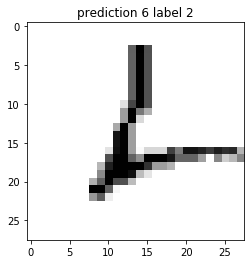

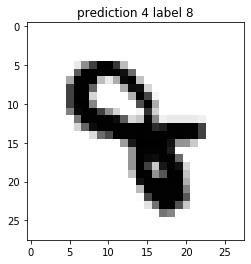

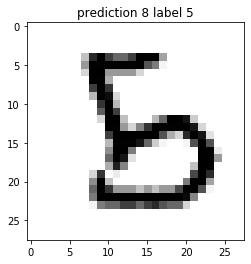

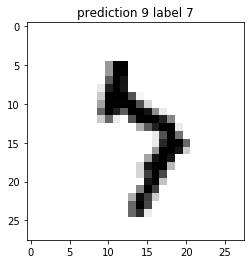

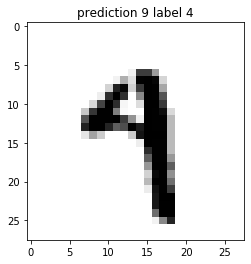

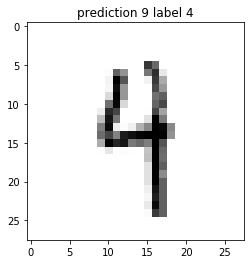

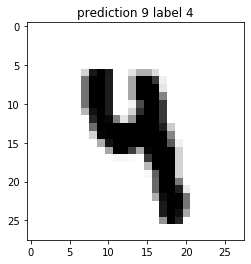

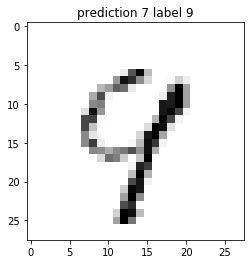

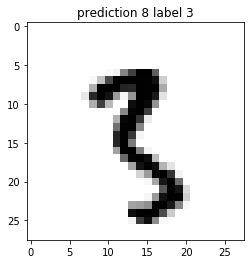

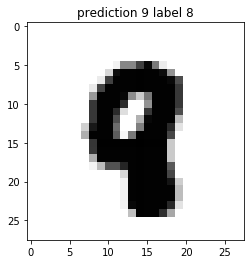

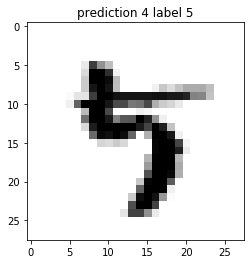

In [0]:
for x in range(1000):
  test_image=test_images[x,:].reshape(1,784)
  predicted_cat=model.predict(test_image).argmax()
  label=test_labels[x].argmax()
 
  if(predicted_cat!=label):
    plt.title("prediction %d label %d"%(predicted_cat,label))
    plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
    plt.show()


# ***Diff btn acc & val_acc***

val_acc is the accuracy computed on the validation set (data that have never been 'seen' by the model).


In summary, acc is the accuracy of a batch of training data and val_acc is the accuracy of a batch of testing data.




May be with 1 hidden layer implementing mnist with keras optimizer adam ,epoch 10 accuracy 97.88 for 8 epochs 98.13 (val_acc)

Added 1 more hidden layer at 8th epoch train_acc=99.45 test_acc=98.17
At 10th epoch train_acc=99.57 test_acc=97.70

# ***Verbose meaning***
By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like Epoch 1/10

